# Welcome to Google Colab!

Before we get started, let's do a brief introduction to this web-based IDE (integrated development environment). The first thing you'll need to do anytime you are working in Colab is set your runtime to R.

A runtime is sort of like starting up a temporary computer. On this computer, you can run R, you can install libraries from the internet (we'll talk about those in a bit), you can upload data, etc.

What we are looking at right now is called a notebook (technically, a Jupyter Notebook, but everyone just calls them notebooks). Your notebook is saved in your Google Drive. It's just a fancy text file! It doesn't actually do anything itself, but it sends code to your runtime and receives the results.

The distincion between your runtime and your notebook is important for this reason:
* Your notebook, saved in Google Drive, will persist until you delete the file. In other words, even after you close your window, you can still get back to your notebook.
* Your runtime, which holds all the data files you upload, the work you do in R, etc. - that gets lost about 90 minutes after you close your Colab window in your browser.

That might sound like a problem, but it's not - because our notebook is the way we communicate with our temporary computer! So if we open our notebook on a new temporary computer (say, the next day), we still have all the commands we need to return to our original state.

Notebooks are made up of cells, and there are two types of cells: code and text. Let's try making our first code cell!

In [50]:
print("Hello world!")

[1] "Hello world!"


Now, we want to run that code using our R runtime so it will execute and return the result. To do that, we can either place our cursor in the cell and click the ▶ button or hit CMD (or CTRL) + ENTER. (Use SHIFT + ENTER to execute and move to the next cell.)

You can also run multiple cells at once using the `Runtime` toolbar or by selecting multiple cells with the CMD (or CTRL) + SHIFT + ENTER.

In [51]:
print("H-O-T T-O G-O!")

[1] "H-O-T T-O G-O!"


Note that if you change the code in a cell and re-run it, the output will change. In general, it is good practice to create new cells when writing new code; you can always delete the cells that contain "dead code."

A few other features of Colab that you should be are of are:
* Section headers and the table of contents
* Moving cells
* Using Gemini AI

# Code

Now let's start coding! We're going to be making graphs in R using the `{ggplot2}` package.

There are many ways to make graphs in R, but the most popular way is with the `{ggplot2}` package. `{ggplot2}` is part of the "tidyverse," a collection of packages that work well together and share similar syntax. We'll be introduced to more tidyverse packages later in the course.

The tidyverse can be installed all at once with the command below. You will need to do this every time you start a new runtime (e.g., when you come back to your notebook after 90 minutes of inactivity) but only once per runtime.

In [52]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



There are a couple of other packages that we will be using today, so we will install them separately.

In [53]:
install.packages("palmerpenguins")
install.packages("remotes") # This is just to install the "nbmisc" package from GitHub
remotes::install_github("nickybell/nbmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'nbmisc' from a github remote, the SHA1 (0316c6fd) has not changed since last install.
  Use `force = TRUE` to force installation



Now we can load the packages. We do this using the `library()` function. You need to do this one per runtime. Therefore, it is a good idea to put all of your `library()` calls at the top of your script.

In [54]:
library(tidyverse)
library(palmerpenguins)

Normally we will load data from an external file such as a CSV, but for this lesson we will use the "penguins" data frame that comes included with the `{palmerpenguins}` package. This data frame contains measurements for three species of penguins (Adelie, Chinstrap, and Gentoo) that were collected from three islands in the Palmer Archipelago, Antarctica.

In [55]:
data(penguins)

In [56]:
glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


# The grammar of graphics

The "grammar of graphics" was created by Leland Wilkinson to describe the way that we make data visualizations. We can imagine building a graph like constructing a sentence: we are adding nouns, verbs, adjectives, conjunctions, etc. together to form a complete sentence. In `{ggplot2}`, we are going to build graphs by adding "layers" together.

A statistical graphic is a **mapping** of **data** variables to *aes**thetic attributes of **geom**etric objects.

Why did I capitalize certain words above? Because they are all words that appear in ggplot code. A ggplot always contains these elements, at minimum:
`ggplot()` function: indicates the data frame to use
`geom_()` function: indicates the type of graph to build
The `geom_()` function includes a mapping to an aesthetic:
e.g., `geom_line(mapping = aes(x = distance, y = time))`
The lines are connected with a `+` sign

Over the course of this class, we will learn how to apply more customization layers to our graphs so that they look the way we would like. But we will start with very simple graphs with only the minimum number of layers.

Okay, let's get started. When you are making a graph, the first thing to think about is the type of data you are working with: discrete or continuous.
Discrete variables do not exist on the number line; they are categories
Continuous variables exist on the number line; they are numbers
Not all numbers are continuous! E.g., months (1 to 12)
These numbers do not have relational meaning; they are merely symbols that replace words

The second thing to think about is how many variables you are graphing: univariate (one variable), bivariate (two variables), or multivariate (3+ variables)?

The combination of variable types and number of variables will determine which graph you should create. I've made a reference guide that you can go back to when you've forgotten which type of graph to use. Remember how we instaled the `{nbmisc}` package earlier? This reference is part of that package.

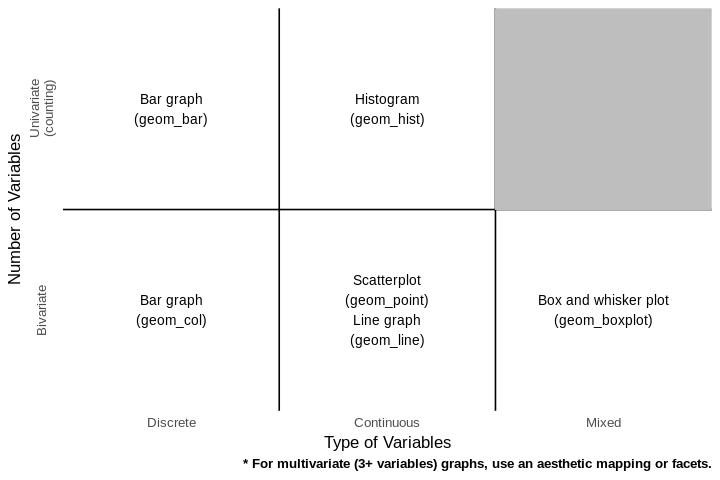

In [57]:
library(nbmisc)
options(repr.plot.width=6, repr.plot.height=4) # this is something you can use in your notebooks to resize graphs - only needed once per notebook, before your first graph
types_of_graphs()

# Univariate graphs

## Discrete variable: bar graph

When working with univariate graphs, we are often just counting values.

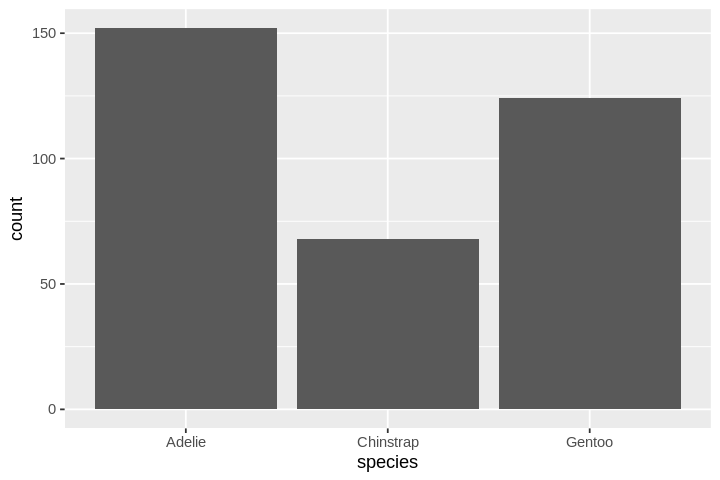

In [58]:
ggplot(data = penguins) +
  geom_bar(mapping = aes(x = species))

## Continuous variable: histogram

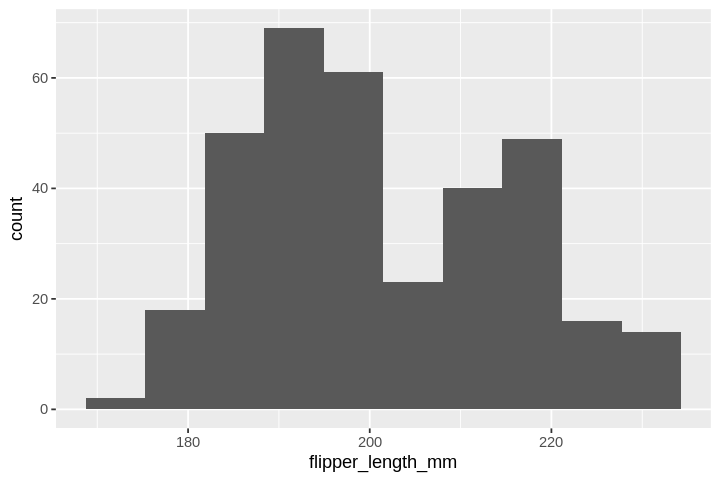

In [59]:
options(warn = -1) # Also only needs to be used once per notebook
ggplot(data = penguins) +
  geom_histogram(mapping = aes(x = flipper_length_mm), bins = 10)

# Bivariate graphs

## 2 discrete variables

**What species of penguins live on each island?**

It is useful to think of this like a table where you have a count for each combination of categories. Don't worry about how this code works for now, just run it to see the table.

In [60]:
count(penguins, island, species, .drop = FALSE)

island,species,n
<fct>,<fct>,<int>
Biscoe,Adelie,44
Biscoe,Chinstrap,0
Biscoe,Gentoo,124
Dream,Adelie,56
Dream,Chinstrap,68
Dream,Gentoo,0
Torgersen,Adelie,52
Torgersen,Chinstrap,0
Torgersen,Gentoo,0


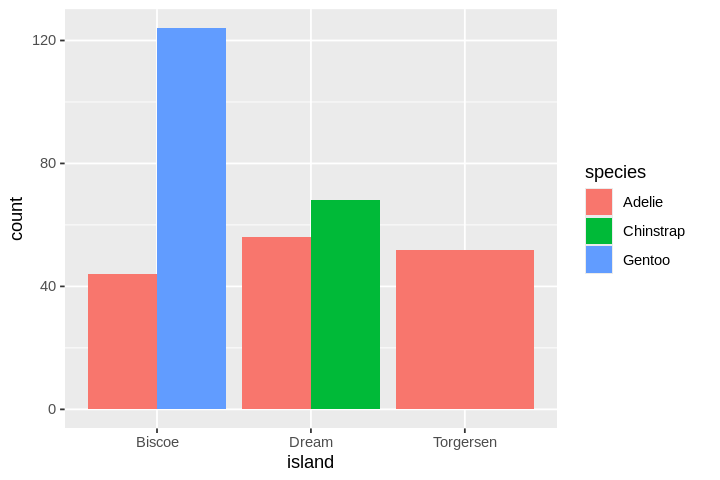

In [61]:
ggplot(data = penguins) +
  geom_bar(aes(x = island, fill = species), position = "dodge")

Notice how `geom_bar()` does all of the counting for us - we just provide the data and the names of the variables. What if we want to be specific about which values to show? Then, we need to use `geom_col()`, which takes a *table of values* rather than the raw data itself.

In [62]:
species_by_island <- count(penguins, island, species, .drop = FALSE)

The `<-` is called the assignment operator. It assigns the value on the right to the name on the left. This is how we create new objects in R.

In [63]:
species_by_island

island,species,n
<fct>,<fct>,<int>
Biscoe,Adelie,44
Biscoe,Chinstrap,0
Biscoe,Gentoo,124
Dream,Adelie,56
Dream,Chinstrap,68
Dream,Gentoo,0
Torgersen,Adelie,52
Torgersen,Chinstrap,0
Torgersen,Gentoo,0


(P.S. If you ever forget the names of the objects in your environment/runtime, use `ls()`)

In [64]:
ls()

[1] "number_penguins"   "p"                 "penguins"         
[4] "penguins_raw"      "species_by_island"

Once we've created an object that contains this new data frame, we can use it in our graph.

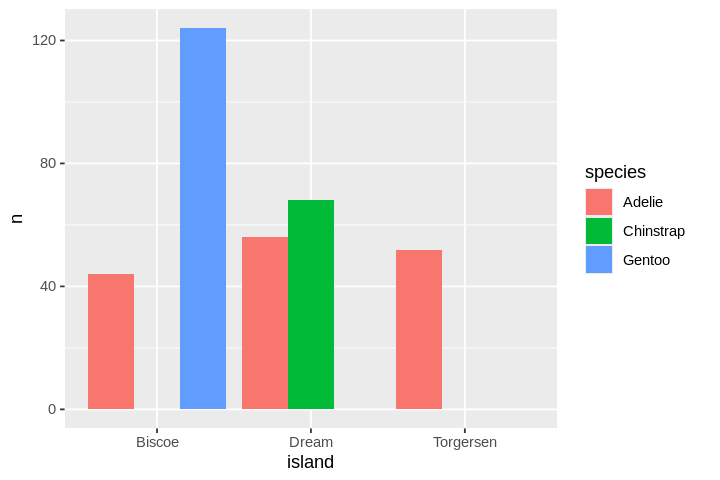

In [65]:
ggplot(data = species_by_island) +
  geom_col(aes(x = island, y = n, fill = species), position = "dodge")

Let's add our first customization. There are some built in "themes" in `{ggplot2}` that can quickly turn a graph into something much more attractive.

In [66]:
p <- ggplot(data = penguins) +
  geom_bar(aes(x = island, fill = species), position = "dodge")

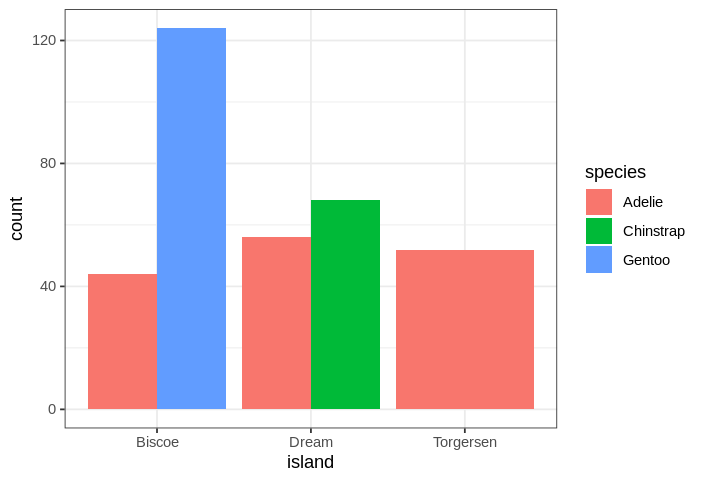

In [67]:
p +
  theme_bw()

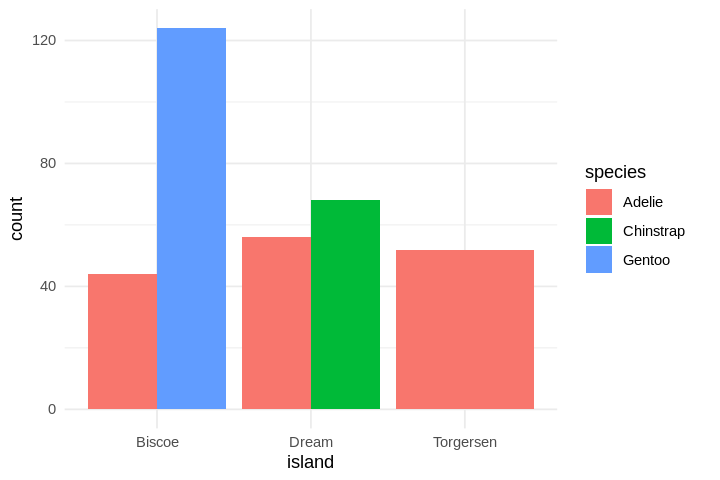

In [68]:
p +
  theme_minimal()

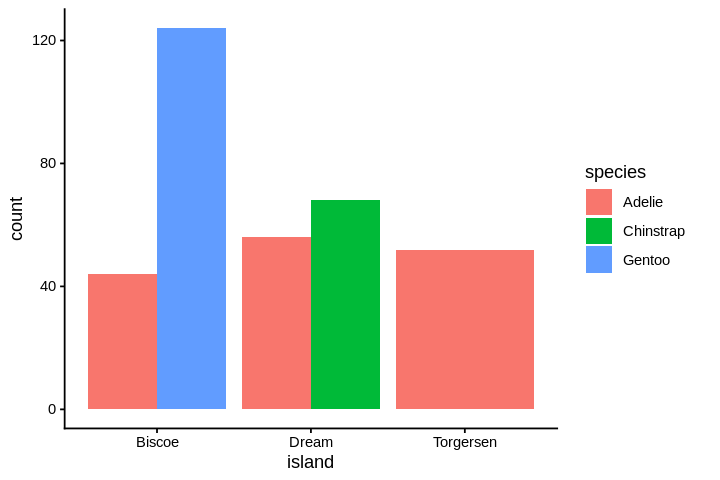

In [69]:
p +
  theme_classic()

There are also other packages the contain additional themes you can use on your graphs. Download the package `{ggthemes}` and load it. Go to https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/ to see the available themes in `{ggthemes}`. Choose one and apply it to our graph.

In [70]:
install.packages("ggthemes")
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



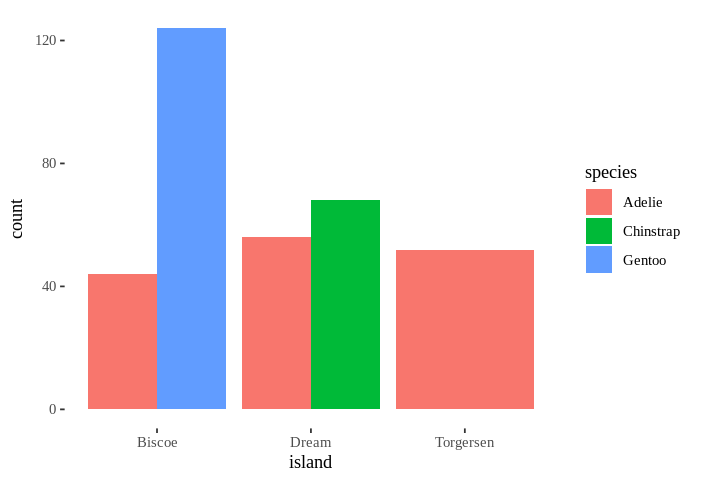

In [71]:
p +
  theme_tufte()

Let's also add some labels to this graph. We can do this with the `labs()` function. Every element inside of an `aes()` mapping can get a label, as well as the title, axis labels, and caption.

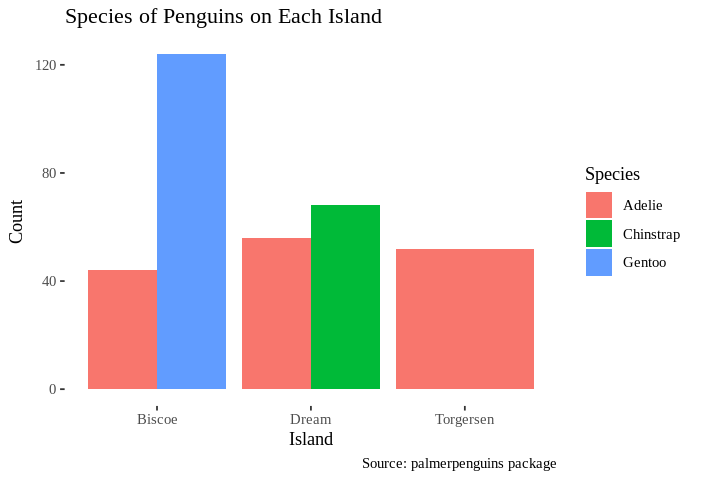

In [72]:
p +
  theme_tufte() +
  labs(
    title = "Species of Penguins on Each Island",
    x = "Island",
    y = "Count",
    fill = "Species",
    caption = "Source: palmerpenguins package"
  )

## 1 discrete variable, 1 continuous variable


**How does flipper length differ by penguins' sex?**

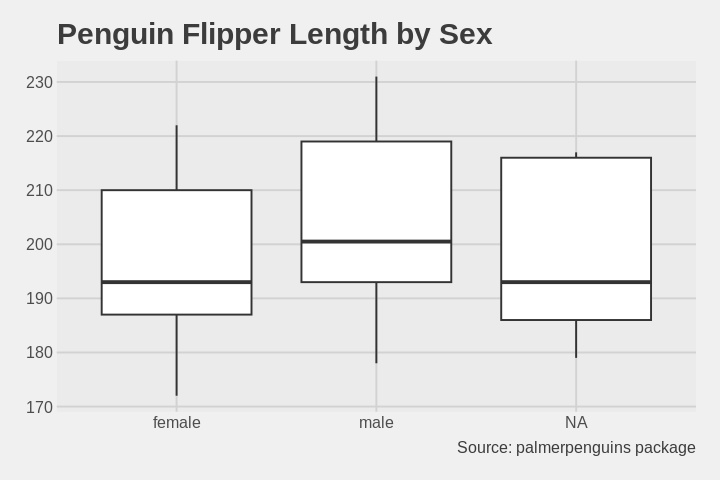

In [73]:
ggplot(data = penguins) +
  geom_boxplot(aes(x = sex, y = flipper_length_mm)) +
  labs(
    x = "Sex",
    y = "Bill Length (mm)",
    title = "Penguin Flipper Length by Sex",
    caption = "Source: palmerpenguins package"
  ) +
  theme_fivethirtyeight()

So far, we've only changed the design of the graph; we haven't changed anything that relates to the data. But on this graph, the scale of the y-axis might be distorting differences to make them appear larger than they actually are. We can modify the way that the *data* is displayed using the scale functions.

The general format is scale_aesthetic_vartype, e.g., `scale_y_continuous`

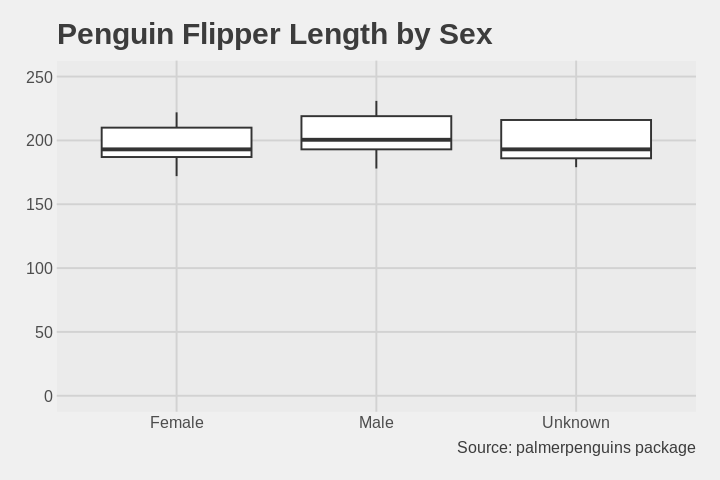

In [74]:
ggplot(data = penguins) +
  geom_boxplot(mapping = aes(x = sex, y = flipper_length_mm)) +
  labs(
    x = "Sex",
    y = "Flipper Length (mm)",
    title = "Penguin Flipper Length by Sex",
    caption = "Source: palmerpenguins package"
  ) +
  theme_fivethirtyeight() +
  scale_y_continuous(limits = c(0, 250)) +
  scale_x_discrete(labels = c("Female", "Male", "Unknown"))

## 2 continuous variables

**Are flipper length and body mass related?**

`geom_smooth()` using formula = 'y ~ x'


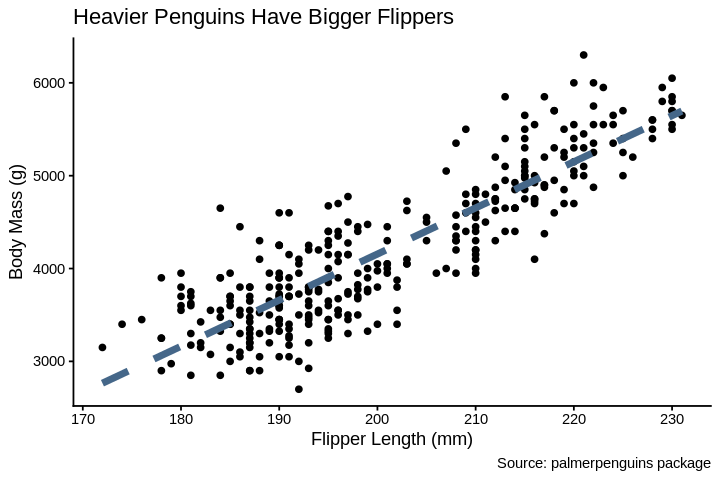

In [75]:
ggplot(data = penguins) +
  geom_point(aes(x = flipper_length_mm, y = body_mass_g)) +
  geom_smooth(
    aes(x = flipper_length_mm, y = body_mass_g),
    method = "lm",
    se = F,
    linetype = "dashed",
    linewidth = 2,
    color = "#456789"
  ) +
  theme_classic() +
  labs(
    x = "Flipper Length (mm)",
    y = "Body Mass (g)",
    title = "Heavier Penguins Have Bigger Flippers",
    caption = "Source: palmerpenguins package"
  )

Why is it acceptable to leave the axis values where they are rather than set them to 0? Because we are interested in the general direction of the relationship (positive or negative) between these variables rather than the values themselves. We would need statistics to measure the *strength* of the relationship.

When the y-axis is ordered, like time, we can use a *line* graph. For example, let's create a data frame that shows the mean bill length for each year of the study. You'll learn how to understand this code in the next module of the course.

In [76]:
number_penguins <- count(penguins, year)

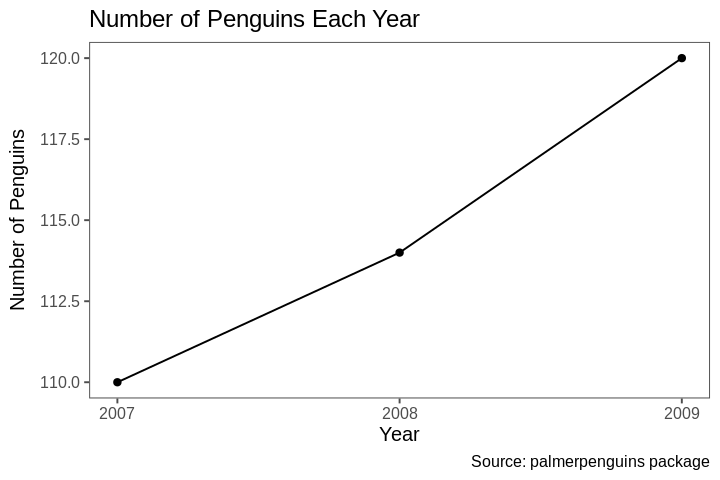

In [77]:
ggplot(data = number_penguins, mapping = aes(x = year, y = n)) +
  geom_line() +
  geom_point() +
  scale_x_continuous(breaks = c(2007:2009)) +
  labs(
    x = "Year",
    y = "Number of Penguins",
    title = "Number of Penguins Each Year",
    caption = "Source: palmerpenguins package"
  ) +
  theme_few()

Let's review what we've learned so far:
1. The grammar of graphics: data, aesthetics, geometric objects
2. Types of variables: discrete vs continuous
3. Number of variables: univariate, bivariate, multivariate
4. Types of graphs: bar graph, histogram, boxplot, scatterplot, line graph
5. Customizing graphs: themes, labels, scales
6. Saving graphs: use the Export button in the Plots pane
You can always refer back to the `types_of_graphs()` function from the `{nbmisc}` package if you forget which type of graph to use.

Now, it's time to submit our work on Blackboard! To submit your work on Blackboard as a .pdf, use the Print option under "File". But first, **be sure to clear any cells and outputs that you don't want to appear in the submission!** There will be deductions for "messy" submissions.